## Aufgabe

Konstruieren Sie einen Datensatz aus fünf Variablen, von denen zwei nach unserem einfachen Korrelationskriterium redundant sind. *Randbedingungen*: Nutzen Sie Wertebereiche $[0, 10]$, einmal positive, einmal negative Korrelation, fünf Datenpunkte, arbeiten Sie mit Abweichungen. 

Zeigen Sie das Resultat mit einer Matrix.

# Abhängigkeiten

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Erzeugen eines DF

In [8]:
# Setzen des Zufallsseeds für Reproduzierbarkeit
np.random.seed(42)

# Erzeugen von drei unabhängigen Basisvariablen mit Werten im Bereich [0, 10]
n = 5  # Anzahl der Datenpunkte
var1 = np.random.uniform(0, 10, n)
var2 = np.random.uniform(0, 10, n)
var3 = np.random.uniform(0, 10, n)

# Erzeugen einer positiv korrelierten redundanten Variable (zu var1)
# Wir addieren eine kleine Abweichung zu var1
abweichung_pos = np.random.normal(0, 0.5, n)  # kleine zufällige Abweichung
var4 = var1 + abweichung_pos
var4 = np.clip(var4, 0, 10)  # sicherstellen, dass Werte im Bereich [0, 10] bleiben

# Erzeugen einer negativ korrelierten redundanten Variable (zu var2)
# Wir subtrahieren var2 von einem Mittelwert und addieren eine kleine Abweichung
mittelwert = 5  # Mittelwert im Bereich [0, 10]
abweichung_neg = np.random.normal(0, 0.5, n)
var5 = (mittelwert - var2) + mittelwert + abweichung_neg
var5 = np.clip(var5, 0, 10)  # Werte im Bereich [0, 10] halten

# Erstellen des DataFrames
data = pd.DataFrame({
    'Variable1': var1,
    'Variable2': var2,
    'Variable3': var3,
    'Variable4_red_pos': var4,  # redundant und positiv korreliert mit Variable1
    'Variable5_red_neg': var5   # redundant und negativ korreliert mit Variable2
})

data

,Variable1,Variable2,Variable3,Variable4_red_pos,Variable5_red_neg
0,3.745401,1.559945,0.205845,3.459711,7.678117
1,9.507143,0.580836,9.699099,9.045102,9.205141
2,7.319939,8.661761,8.324426,6.013665,0.967035
3,5.986585,6.011150,2.123391,6.461770,3.637178
4,1.560186,7.080726,1.818250,1.968409,1.849464


# Korrelationen

In [9]:
corr = data.corr(numeric_only=True)
corr

,Variable1,Variable2,Variable3,Variable4_red_pos,Variable5_red_neg
Variable1,1.000000,-0.288389,0.849226,0.975386,0.375289
Variable2,-0.288389,1.000000,-0.037396,-0.341028,-0.995407
Variable3,0.849226,-0.037396,1.000000,0.772019,0.105488
Variable4_red_pos,0.975386,-0.341028,0.772019,1.000000,0.426733
Variable5_red_neg,0.375289,-0.995407,0.105488,0.426733,1.000000


<Axes: >

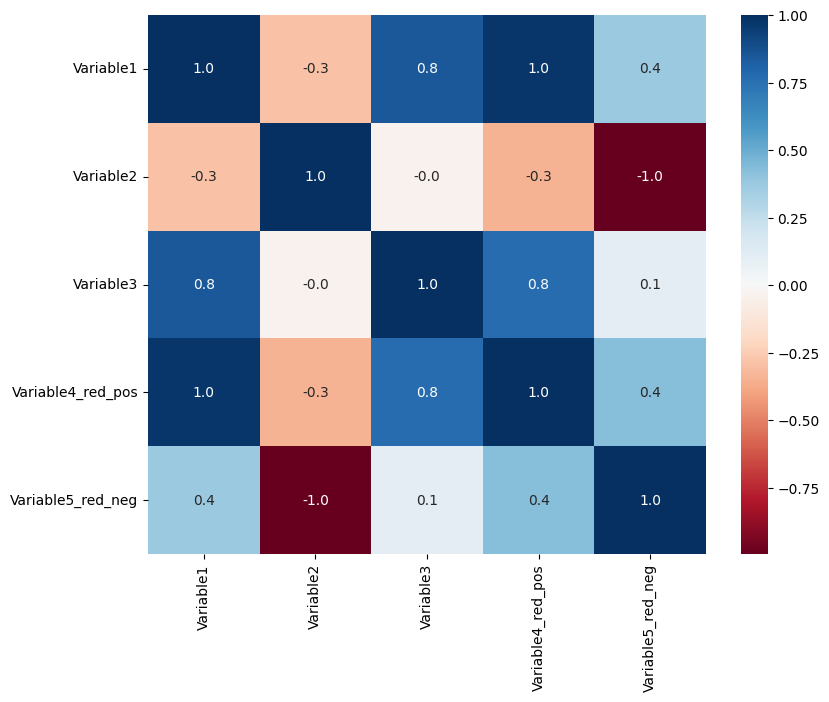

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdBu', center=0, ax=ax)